In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
# We don't need y_train and y_test
(x_train, _), (x_test, _) = mnist.load_data()
print('Max value in the x_train is', x_train[0].max())
print('Min value in the x_train is', x_train[0].min())

11501568/11490434 [==============================] - 0s 0us/step
Max value in the x_train is 255
Min value in the x_train is 0


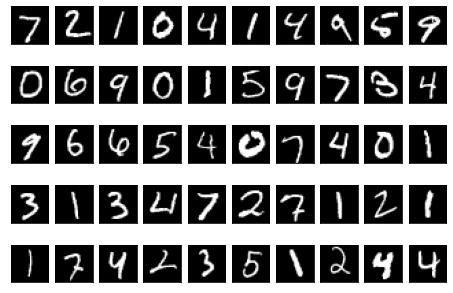

In [2]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 10) 
fig.tight_layout(pad=-1)
plt.gray()
a = 0 
for i in range(5): 
  for j in range(10): 
    axs[i, j].imshow(tf.squeeze(x_test[a])) 
    axs[i, j].xaxis.set_visible(False) 
    axs[i, j].yaxis.set_visible(False) 
    a = a + 1 

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_test

In [4]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Noise = 0.3

In [6]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

In [7]:
x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.) 
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

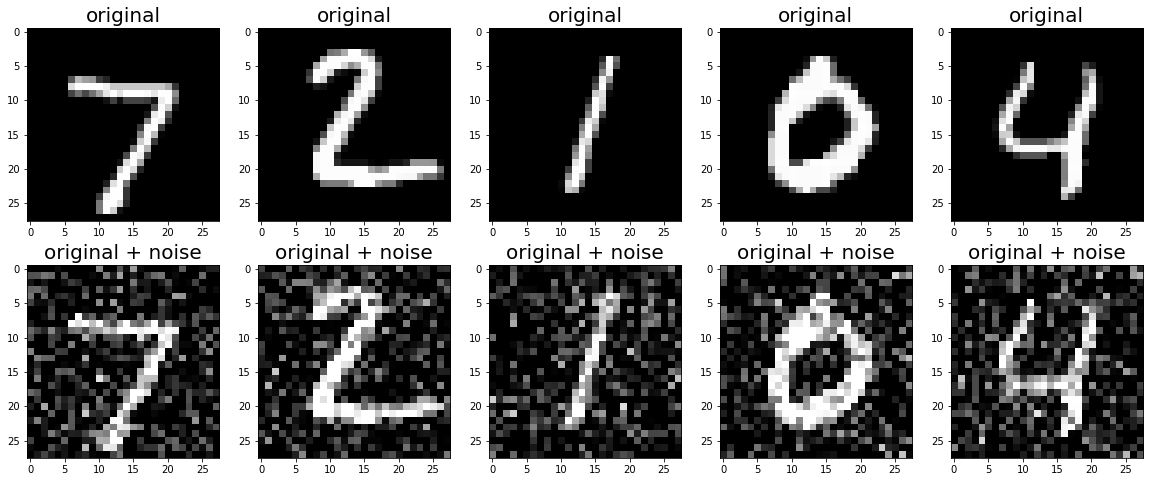

In [8]:

n = 5
plt.figure(figsize=(20, 8))
plt.gray()
for i in range(n):
  ax = plt.subplot(2, n, i + 1) 
  plt.title("original", size=20) 
  plt.imshow(tf.squeeze(x_test[i])) 
  plt.gray() 
  bx = plt.subplot(2, n, n+ i + 1) 
  plt.title("original + noise", size=20) 
  plt.imshow(tf.squeeze(x_test_noisy[i])) 
plt.show()

In [9]:
from tensorflow.keras.layers import Conv2DTranspose, Conv2D, Input

class NoiseReducer(tf.keras.Model): 
  def __init__(self):

    super(NoiseReducer, self).__init__() 

    self.encoder = tf.keras.Sequential([ 
      Input(shape=(28, 28, 1)), 
      Conv2D(16, (3,3), activation='relu', padding='same', strides=2), 
      Conv2D(8, (3,3), activation='relu', padding='same', strides=2)]) 
    
    self.decoder = tf.keras.Sequential([ 
      Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'), 
      Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'), 
      Conv2D(1, kernel_size=(3,3), activation='sigmoid', padding='same')]) 
  
  def call(self, x): 
    encoded = self.encoder(x) 
    decoded = self.decoder(encoded) 
    return decoded

In [10]:
autoencoder = NoiseReducer()

In [11]:
autoencoder.compile(optimizer='adam', loss='mse')

In [12]:
autoencoder.fit(x_train_noisy, 
                x_train, 
                epochs=10, 
                shuffle=True, 
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 20s 4ms/step - loss: 0.1140 - val_loss: 0.1140
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1

In [15]:
encoded_imgs=autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs)
autoencoder.summary()

Model: "noise_reducer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 7, 7, 8)           1320      
                                                                 
 sequential_1 (Sequential)   (None, 28, 28, 1)         1897      
                                                                 
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [18]:
results = autoencoder.evaluate(x_test_noisy, x_test, batch_size=128)
print("test loss, test acc:", results)

79/79 [==============================] - 1s 6ms/step - loss: 0.1140
test loss, test acc: 0.11395812034606934


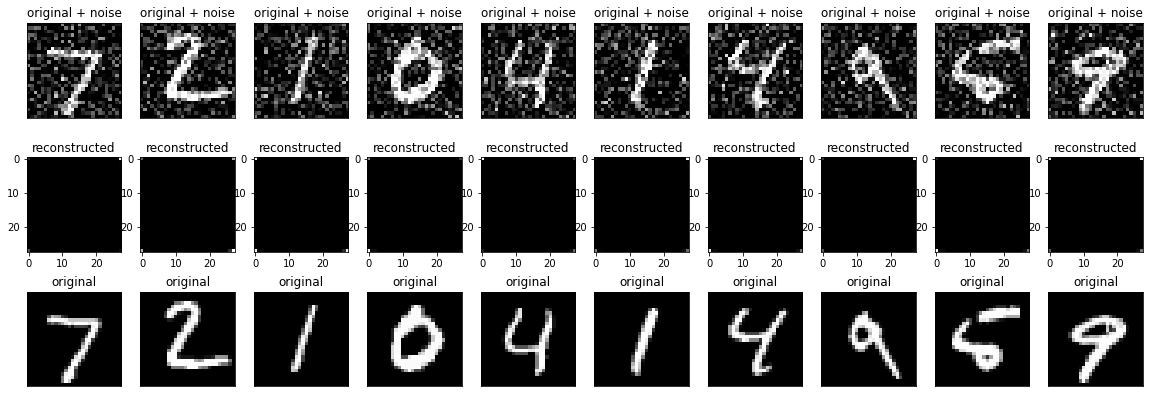

In [20]:
n = 10 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
  bx = plt.subplot(3, n, i + 1) 
  plt.title("original + noise") 
  plt.imshow(tf.squeeze(x_test_noisy[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display reconstruction 
  cx = plt.subplot(3, n, i + n + 1) 
  plt.title("reconstructed") 
  plt.imshow(tf.squeeze(decoded_imgs[i])) 
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  
  # display original 
  ax = plt.subplot(3, n, i + 2*n + 1) 
  plt.title("original") 
  plt.imshow(tf.squeeze(x_test[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 

plt.show()

Noise = 0.1

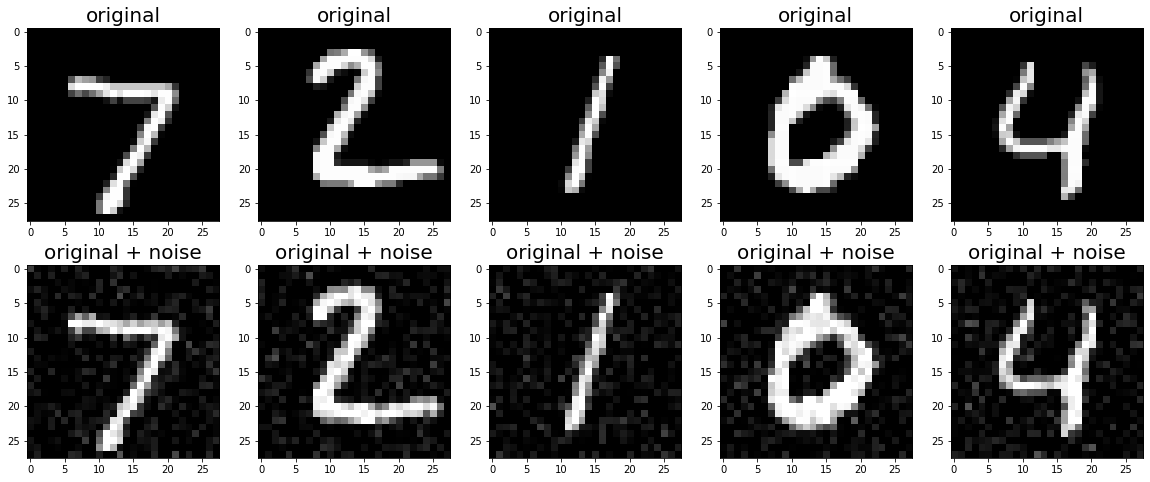

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0126 - val_loss: 0.0025
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.001

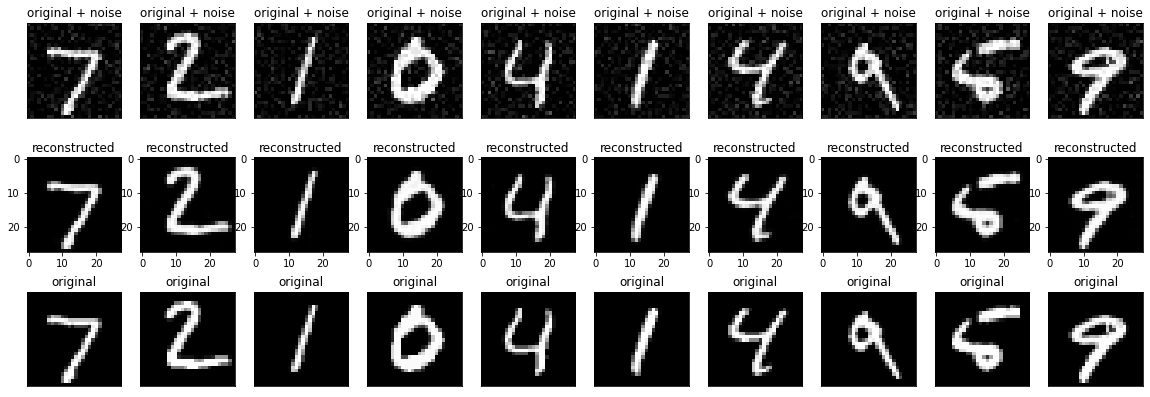

Model: "noise_reducer_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 7, 7, 8)           1320      
                                                                 
 sequential_3 (Sequential)   (None, 28, 28, 1)         1897      
                                                                 
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________
None
79/79 [==============================] - 0s 4ms/step - loss: 0.0015
test loss, test acc: 0.0014879986410960555


In [21]:
noise_factor = 0.1
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.) 
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

n = 5
plt.figure(figsize=(20, 8))
plt.gray()
for i in range(n):
  ax = plt.subplot(2, n, i + 1) 
  plt.title("original", size=20) 
  plt.imshow(tf.squeeze(x_test[i])) 
  plt.gray() 
  bx = plt.subplot(2, n, n+ i + 1) 
  plt.title("original + noise", size=20) 
  plt.imshow(tf.squeeze(x_test_noisy[i])) 
plt.show()

autoencoder = NoiseReducer()
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train_noisy, 
                x_train, 
                epochs=10, 
                shuffle=True, 
                validation_data=(x_test_noisy, x_test))

encoded_imgs=autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
  bx = plt.subplot(3, n, i + 1) 
  plt.title("original + noise") 
  plt.imshow(tf.squeeze(x_test_noisy[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display reconstruction 
  cx = plt.subplot(3, n, i + n + 1) 
  plt.title("reconstructed") 
  plt.imshow(tf.squeeze(decoded_imgs[i])) 
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  
  # display original 
  ax = plt.subplot(3, n, i + 2*n + 1) 
  plt.title("original") 
  plt.imshow(tf.squeeze(x_test[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 

plt.show()
print(autoencoder.summary())
results = autoencoder.evaluate(x_test_noisy, x_test, batch_size=128)
print("test loss, test acc:", results)

Noise = 0.5

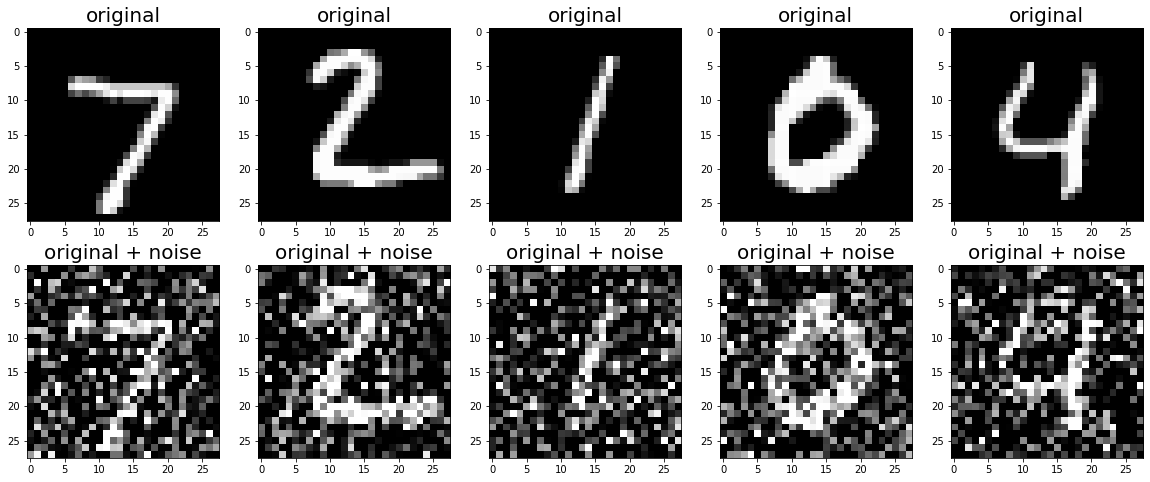

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1136 - val_loss: 0.1140
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.112

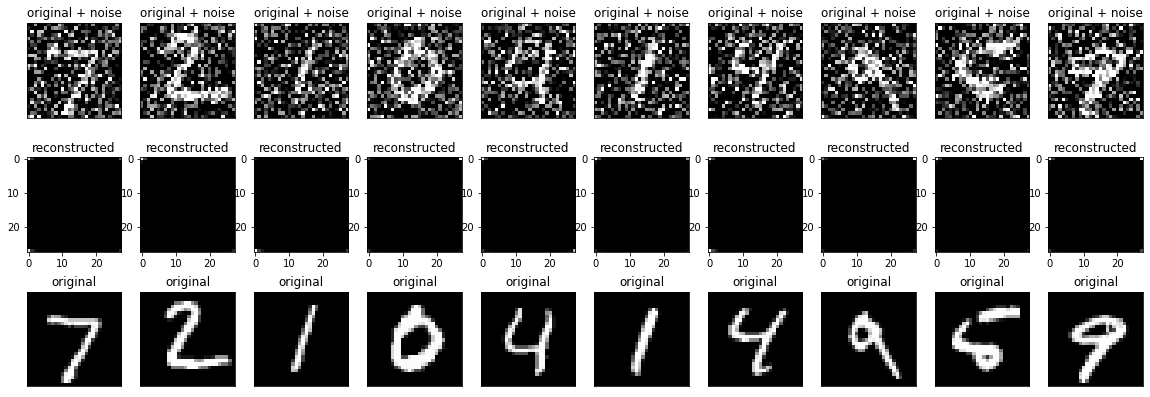

Model: "noise_reducer_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 7, 7, 8)           1320      
                                                                 
 sequential_5 (Sequential)   (None, 28, 28, 1)         1897      
                                                                 
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________
None
79/79 [==============================] - 0s 4ms/step - loss: 0.1140
test loss, test acc: 0.11395812034606934


In [22]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.) 
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

n = 5
plt.figure(figsize=(20, 8))
plt.gray()
for i in range(n):
  ax = plt.subplot(2, n, i + 1) 
  plt.title("original", size=20) 
  plt.imshow(tf.squeeze(x_test[i])) 
  plt.gray() 
  bx = plt.subplot(2, n, n+ i + 1) 
  plt.title("original + noise", size=20) 
  plt.imshow(tf.squeeze(x_test_noisy[i])) 
plt.show()

autoencoder = NoiseReducer()
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train_noisy, 
                x_train, 
                epochs=10, 
                shuffle=True, 
                validation_data=(x_test_noisy, x_test))

encoded_imgs=autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
  bx = plt.subplot(3, n, i + 1) 
  plt.title("original + noise") 
  plt.imshow(tf.squeeze(x_test_noisy[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display reconstruction 
  cx = plt.subplot(3, n, i + n + 1) 
  plt.title("reconstructed") 
  plt.imshow(tf.squeeze(decoded_imgs[i])) 
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  
  # display original 
  ax = plt.subplot(3, n, i + 2*n + 1) 
  plt.title("original") 
  plt.imshow(tf.squeeze(x_test[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 

plt.show()
print(autoencoder.summary())
results = autoencoder.evaluate(x_test_noisy, x_test, batch_size=128)
print("test loss, test acc:", results)

Noise = 0

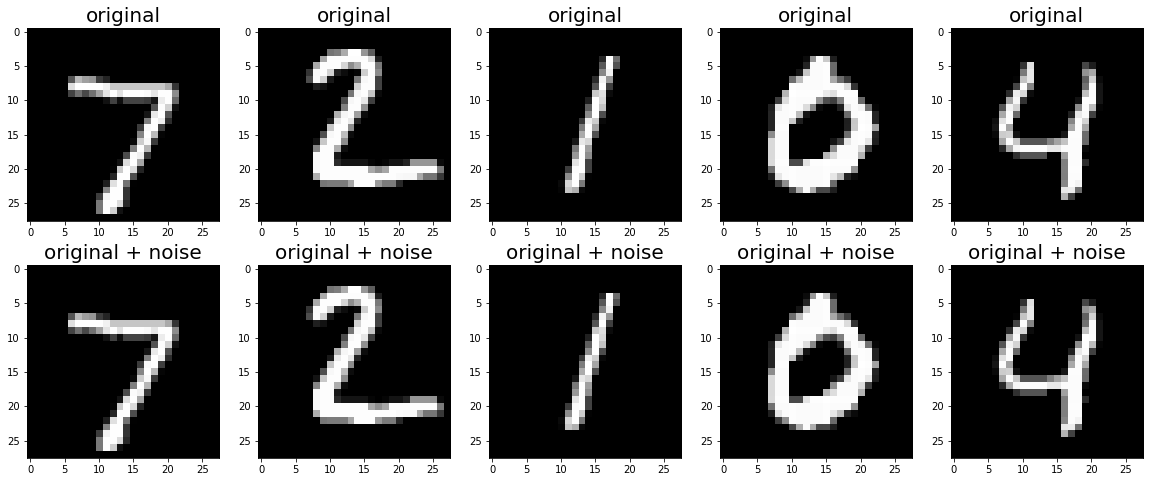

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0106 - val_loss: 0.0020
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0017 - val_loss: 0.0014
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0011 - val_loss: 9.3324e-04
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 8.9409e-04 - val_loss: 8.5447e-04
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 8.2820e-04 - val_loss: 7.8182e-04
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 7.5302e-04 - val_loss: 7.1346e-04
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 7.0499e-04 - val_loss: 6.7710e-04
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 6.7946e-04 - val_loss: 6.5615e-04
Epoch 10/10
1875/1875 [===============

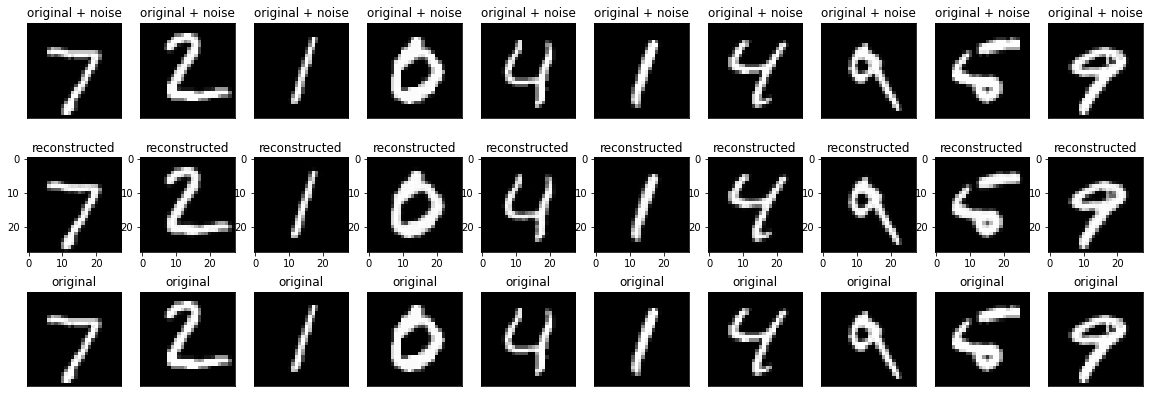

Model: "noise_reducer_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 7, 7, 8)           1320      
                                                                 
 sequential_7 (Sequential)   (None, 28, 28, 1)         1897      
                                                                 
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________
None
79/79 [==============================] - 0s 4ms/step - loss: 6.3161e-04
test loss, test acc: 0.0006316084181889892


In [23]:
noise_factor = 0.0
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.) 
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

n = 5
plt.figure(figsize=(20, 8))
plt.gray()
for i in range(n):
  ax = plt.subplot(2, n, i + 1) 
  plt.title("original", size=20) 
  plt.imshow(tf.squeeze(x_test[i])) 
  plt.gray() 
  bx = plt.subplot(2, n, n+ i + 1) 
  plt.title("original + noise", size=20) 
  plt.imshow(tf.squeeze(x_test_noisy[i])) 
plt.show()

autoencoder = NoiseReducer()
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(x_train_noisy, 
                x_train, 
                epochs=10, 
                shuffle=True, 
                validation_data=(x_test_noisy, x_test))

encoded_imgs=autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs=autoencoder.decoder(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 7))
plt.gray()
for i in range(n): 
  # display original + noise 
  bx = plt.subplot(3, n, i + 1) 
  plt.title("original + noise") 
  plt.imshow(tf.squeeze(x_test_noisy[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 
  
  # display reconstruction 
  cx = plt.subplot(3, n, i + n + 1) 
  plt.title("reconstructed") 
  plt.imshow(tf.squeeze(decoded_imgs[i])) 
  bx.get_xaxis().set_visible(False) 
  bx.get_yaxis().set_visible(False) 
  
  # display original 
  ax = plt.subplot(3, n, i + 2*n + 1) 
  plt.title("original") 
  plt.imshow(tf.squeeze(x_test[i])) 
  ax.get_xaxis().set_visible(False) 
  ax.get_yaxis().set_visible(False) 

plt.show()
print(autoencoder.summary())
results = autoencoder.evaluate(x_test_noisy, x_test, batch_size=128)
print("test loss, test acc:", results)